In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%run finance.ipynb

names = ['MSCI World', "MSCI World", 'S&P 500', 'Euro Stoxx 50 Nr.1', \
         'China', 'India', 'Emerging Asia', 'Small Caps USA Nr.1', \
        'Small Caps USA Nr.2', 'Dividenden Aristocrats Nr.1', 'Dividenden Aristocrats Nr.2', 'Growth Nr.1', 'Growth Nr.2',  \
        'REIT', 'TIPS', 'Money Market', 'GER Bonds 10y','US Bonds 1-3y', 'US Bonds 20y']

ETFs = ['WLD.PA', 'EUNL.DE', 'SPY', 'EXFN.L',  \
        'LG9.SI', 'LG8.SI', 'AASI.PA', 'SXRG.F', 'ISP6.L', 'XDND.F', 'UDVD.L', 'IDJG.AS', 'LGWT.DE', \
            'XREA.F', 'EMI.MI', 'C101.F', '8523.F', 'XUT3.L', 'IDTL.L']

data = {}

text = "Nr         Category         Name         ISIN\n"  

# Correlations between different assets

In this notebook we want to compute correlations between the assets defined above. We expect, that stocks have a positive correlation (near 1), while Bond ETFs should show a slighlty negative correlation to stock ETFs.

In [45]:
bond_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="Bonds")
etf_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="ETF")
bond_info = bond_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]
etf_info = etf_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]

info = pd.concat([etf_info, bond_info])
info.reset_index(inplace=True)

for n, asset in enumerate(ETFs):
    full_name = str(info[info['yahoo ticker'] == asset]['Name']).split("\n")[0].split("    ")[1]
    ISIN = str(info[info['yahoo ticker'] == asset]['ISIN']).split("\n")[0].split("    ")[1]
    text += str(n) + "         " + names[n] + "         " + full_name + "         " + ISIN +"\n"

In [46]:
(mindate, maxdate) = get_overlapping_timerange(ETFs)
heat = prepare_portfolio_data(mindate, maxdate, ETFs)
pearson_correlation = pearson(heat)

In [47]:
print("Maximum timeframe used ranges from ", mindateate, " to maxdateaxdate)

Maximum timeframe used ranges from  2015-01-21 00:00:00  to  2019-05-29 00:00:00


For the computation we used the maximum timeframe we got for all assets. The correlations might be more clear when using a larger timeframe, where recessions where occuring. The time from 2015 to 2019 was a single, long bull market. However, we can clearly see the somewhat negative correlation between assets number 15 and 17, which track both short-term bonds or index rates. When using a longer timeframe, we should also see a negative correlation of most of the assets with the last asset in the list (20 years US treasury bonds ETF). Here, the timeframe is too short to see a clear correlation effect.

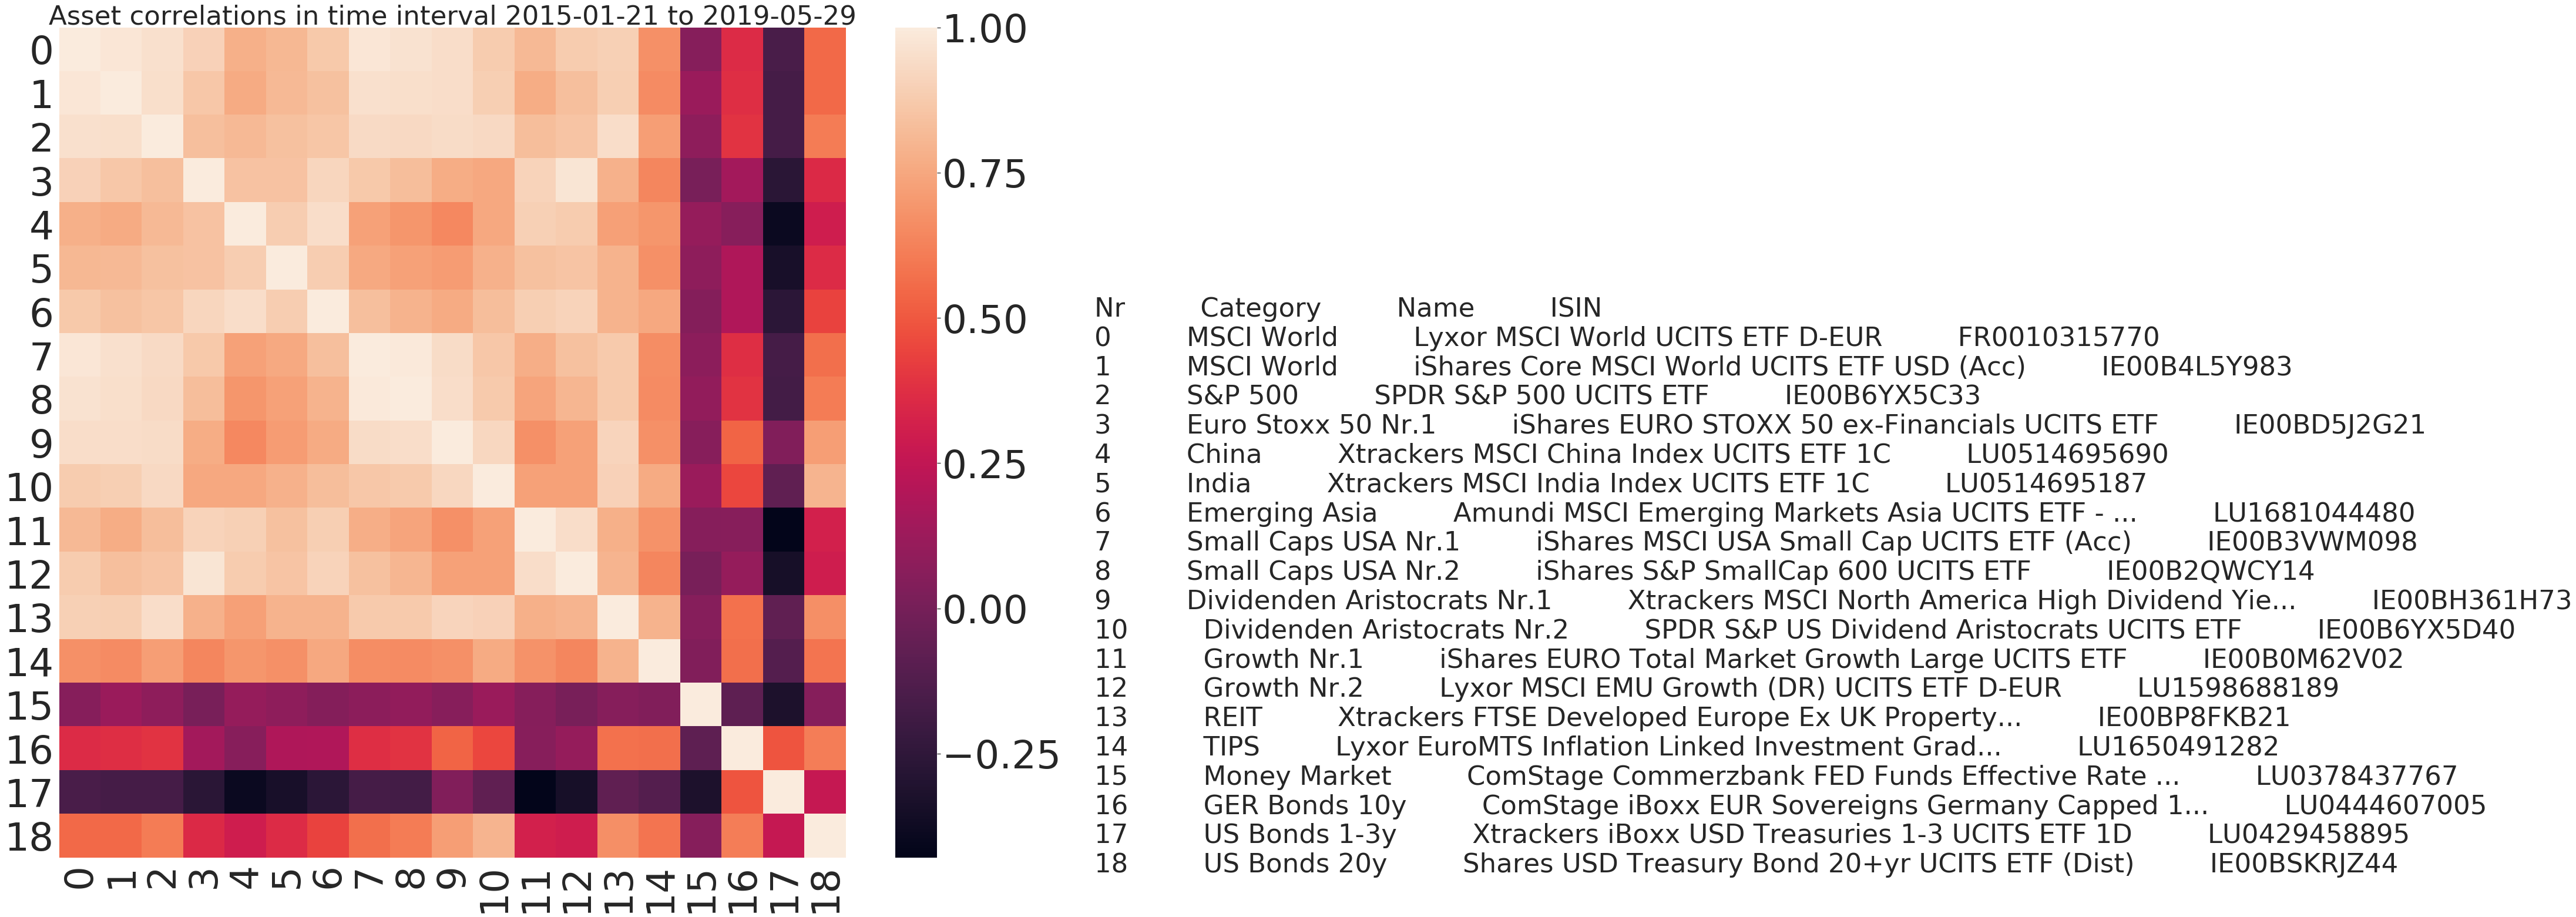

In [44]:
fig = plt.figure(figsize=(30,26))
plt.title("Asset correlations in time interval {0} to {1}".format(str(mindate).split(" ")[0], \
                                                               str(maxdate).split(" ")[0]), fontsize=45);
sns.heatmap(pearson_correlation);
sns.set(font_scale=6)
plt.text(25,20, text, fontsize = 45);